In [104]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [177]:
# Standard Data Science Imports
import numpy as np
import pandas as pd
from pandas import DataFrame

In [178]:
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
# Scikit-learn
import sklearn
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

# File import
med_df=pd.read_csv('medical_clean.csv', index_col=0)

In [180]:
# Examining fist five records of dataset
med_df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [181]:
# Viewing DataFrame descriptive information
med_df.info

<bound method DataFrame.info of           Customer_id                           Interaction  \
CaseOrder                                                     
1             C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
2             Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
3             F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
4             A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
5             C544523  5885f56b-d6da-43a3-8760-83583af94266   
...               ...                                   ...   
9996          B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9997          P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9998          R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9999          E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
10000         I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                        UID          City State        County  \
CaseOrder                                                          

In [182]:
# Getting an overview of descriptive stats
med_df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [183]:
# Getting data types of features
med_df.dtypes

Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety   

In [184]:
# Checking for null values
med_df.isnull()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [185]:
# Renaming the last 8 Survey Columns for better description of variables
med_df.rename(columns = {'Item1' : 'TimelyResponse',
                           'Item2' : 'Fixes' ,
                           'Item3' : 'Replacements' ,
                           'Item4' : 'Reliability' ,
                           'Item5' : 'Options' ,
                           'Item6' : 'Respectfulness' ,
                           'Item7' : 'Courteous' ,
                           'Item8' : 'Listening'},
                          inplace=True)

In [186]:
# Converting ordinal categorical data into numeric variables
med_df['Area_num'] = med_df.Area.map({'Rural' : 0, 'Urban' : 1, 'Suburban' : 2})
med_df['Marital_num'] = med_df.Marital.map({'Never Married' : 0, 'Married' : 1, 'Separated' : 2, 'Divorced' : 3, 'Widowed' : 4})
med_df['Gender_num'] = med_df.Gender.map({'Nonbinary' : 0, 'Male' : 1, 'Female' : 2})
med_df['Initial_admin_num'] = med_df.Initial_admin.map({'Elective Admission' : 0, 'Observation Admission' : 1, 'Emergency Admission' : 2})
med_df['Complication_risk_num'] = med_df.Complication_risk.map({'Low' : 0, 'Medium' : 1, 'High' : 2})
med_df['Services_num'] = med_df.Services.map({'Blood Work' : 0, 'Intravenous' : 1, 'CT Scan' : 2, 'MRI' : 3})

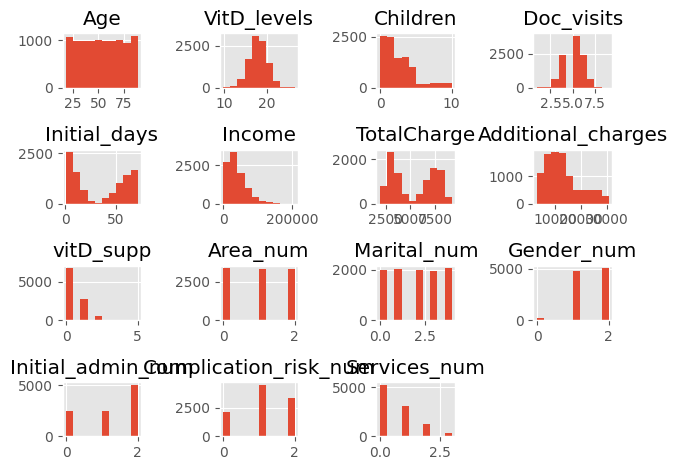

In [187]:
# Histograms of continuous variables
med_df[['Age', 'VitD_levels', 'Children',  'Doc_visits', 'Initial_days', 'Income', 'TotalCharge',
          'Additional_charges', 'vitD_supp', 'Area_num','Marital_num','Gender_num','Initial_admin_num', 'Complication_risk_num', 'Services_num']].hist()
plt.savefig('med_pyplott1.jpg')
plt.tight_layout()

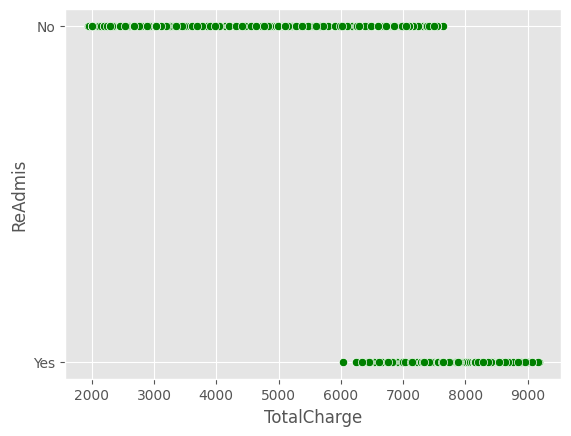

In [188]:
# A scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=med_df['TotalCharge'], y=med_df['ReAdmis'], color='green')
plt.show()

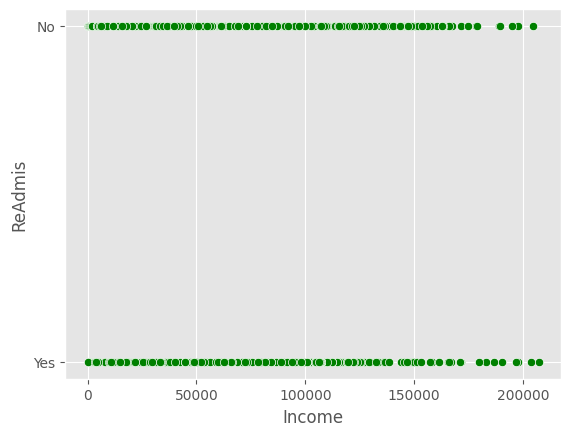

In [189]:
# A scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=med_df['Income'], y=med_df['ReAdmis'], color='green')
plt.show()

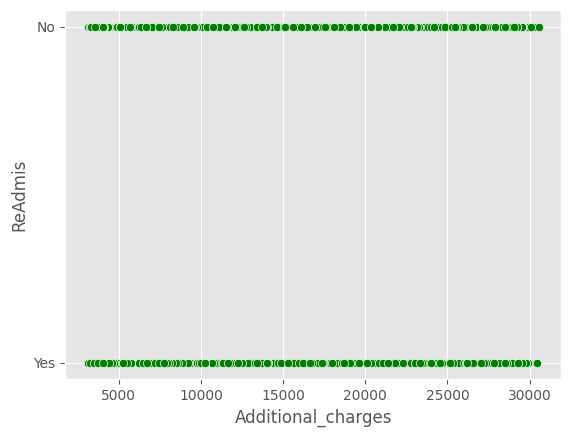

In [190]:
# A scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=med_df['Additional_charges'], y=med_df['ReAdmis'], color='green')
plt.show()

In [191]:
# Setting the plot style to ggplot
plt.style.use('ggplot')

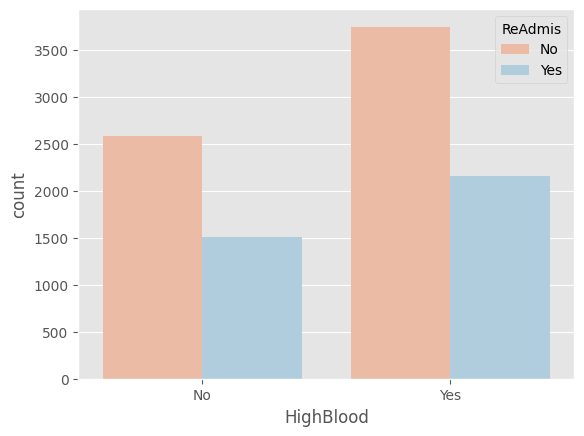

In [192]:
# Countplots of categorical variables
plt.figure()
sns.countplot(x='HighBlood', hue='ReAdmis', data=med_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

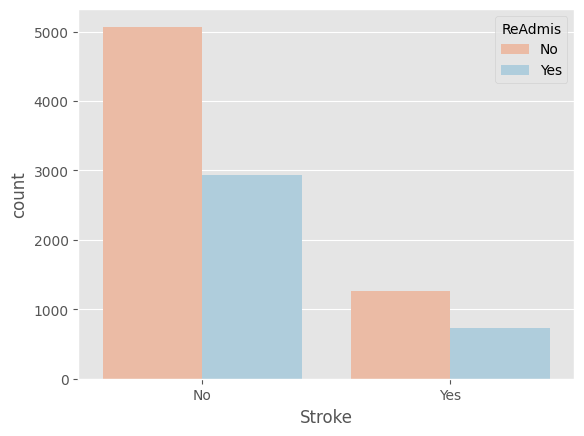

In [193]:
plt.figure()
sns.countplot(x='Stroke', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

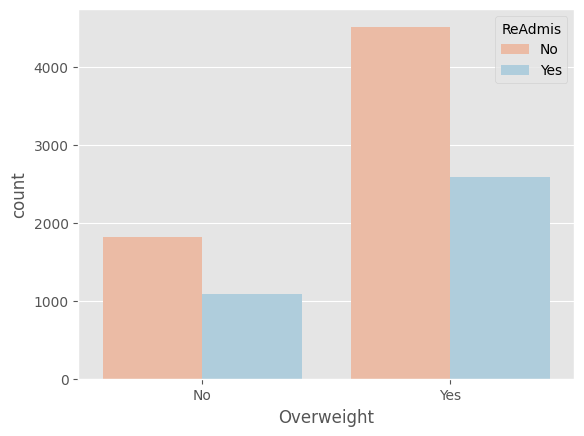

In [194]:
plt.figure()
sns.countplot(x='Overweight', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

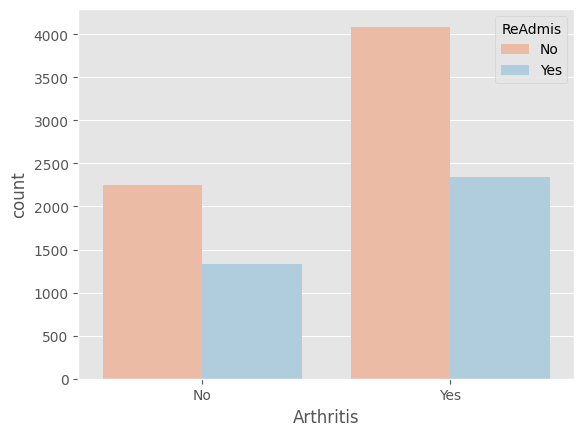

In [195]:
plt.figure()
sns.countplot(x='Arthritis', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

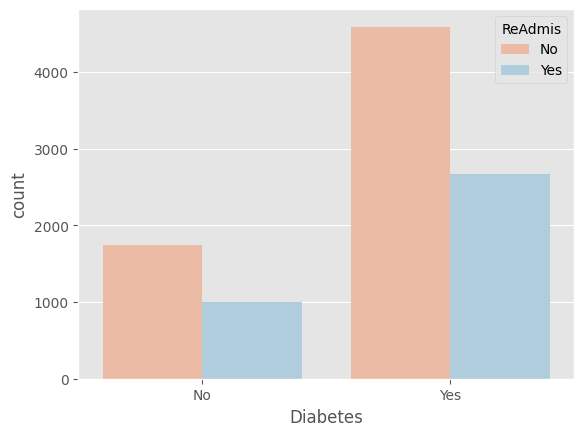

In [196]:
plt.figure()
sns.countplot(x='Diabetes', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

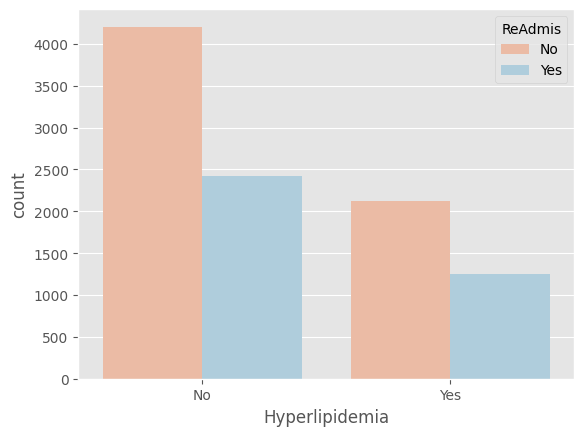

In [197]:
plt.figure()
sns.countplot(x='Hyperlipidemia', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

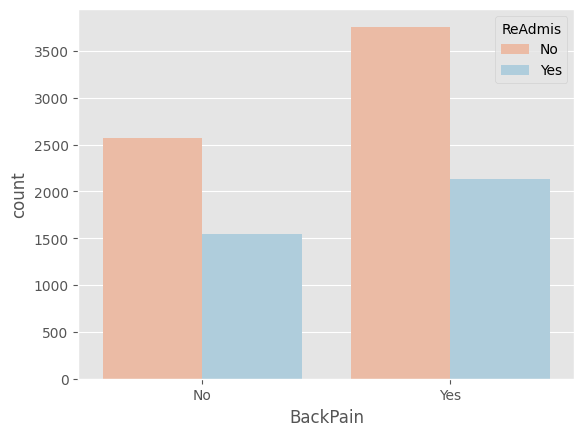

In [198]:
plt.figure()
sns.countplot(x='BackPain', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

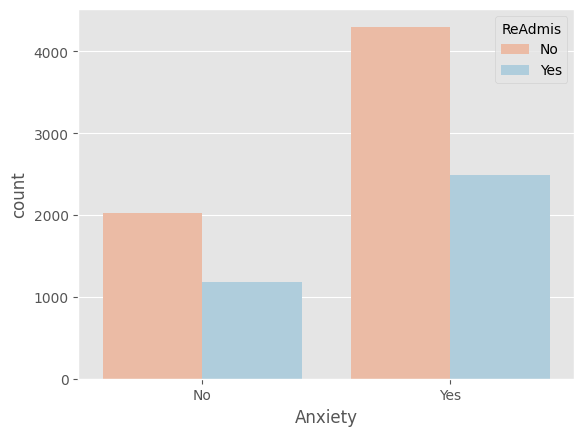

In [199]:
plt.figure()
sns.countplot(x='Anxiety', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

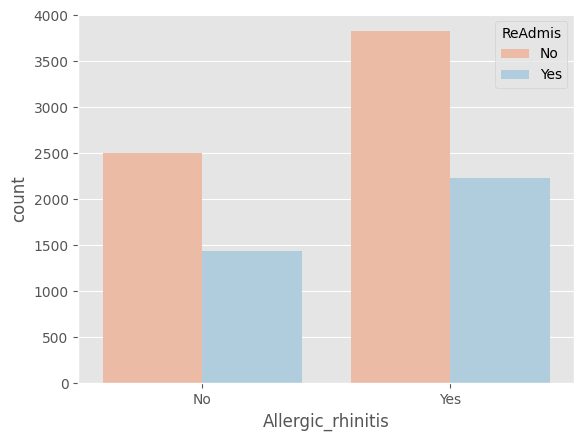

In [200]:
plt.figure()
sns.countplot(x='Allergic_rhinitis', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

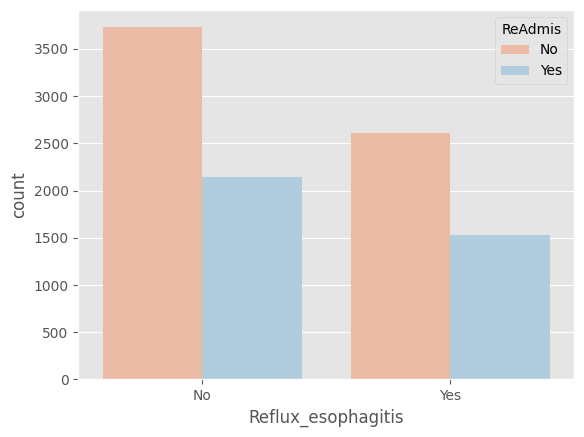

In [201]:
plt.figure()
sns.countplot(x='Reflux_esophagitis', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

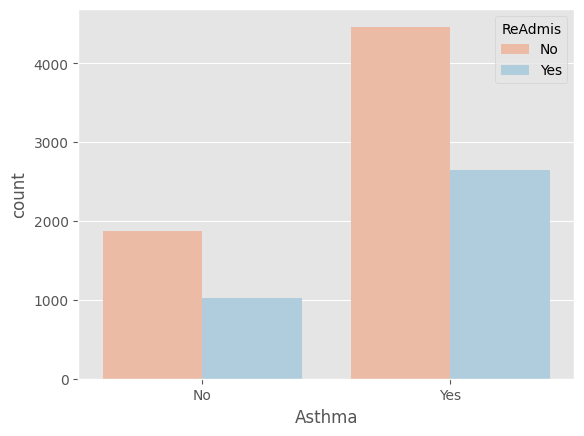

In [202]:
plt.figure()
sns.countplot(x='Asthma', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

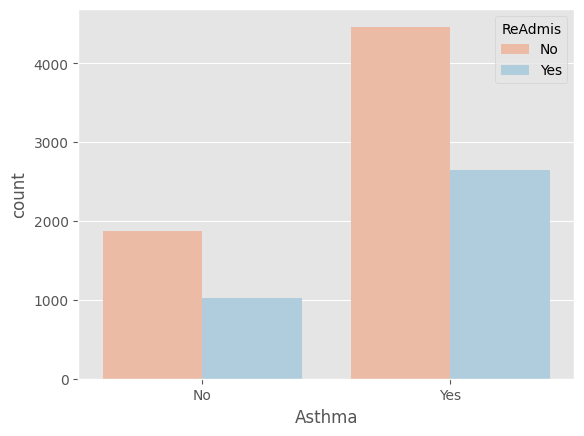

In [203]:
plt.figure()
sns.countplot(x='Asthma', hue='ReAdmis', data=med_df, palette ='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

array([[<Axes: xlabel='TimelyResponse', ylabel='TimelyResponse'>,
        <Axes: xlabel='Fixes', ylabel='TimelyResponse'>,
        <Axes: xlabel='Replacements', ylabel='TimelyResponse'>,
        <Axes: xlabel='Reliability', ylabel='TimelyResponse'>,
        <Axes: xlabel='Options', ylabel='TimelyResponse'>,
        <Axes: xlabel='Respectfulness', ylabel='TimelyResponse'>,
        <Axes: xlabel='Courteous', ylabel='TimelyResponse'>,
        <Axes: xlabel='Listening', ylabel='TimelyResponse'>],
       [<Axes: xlabel='TimelyResponse', ylabel='Fixes'>,
        <Axes: xlabel='Fixes', ylabel='Fixes'>,
        <Axes: xlabel='Replacements', ylabel='Fixes'>,
        <Axes: xlabel='Reliability', ylabel='Fixes'>,
        <Axes: xlabel='Options', ylabel='Fixes'>,
        <Axes: xlabel='Respectfulness', ylabel='Fixes'>,
        <Axes: xlabel='Courteous', ylabel='Fixes'>,
        <Axes: xlabel='Listening', ylabel='Fixes'>],
       [<Axes: xlabel='TimelyResponse', ylabel='Replacements'>,
        <Axe

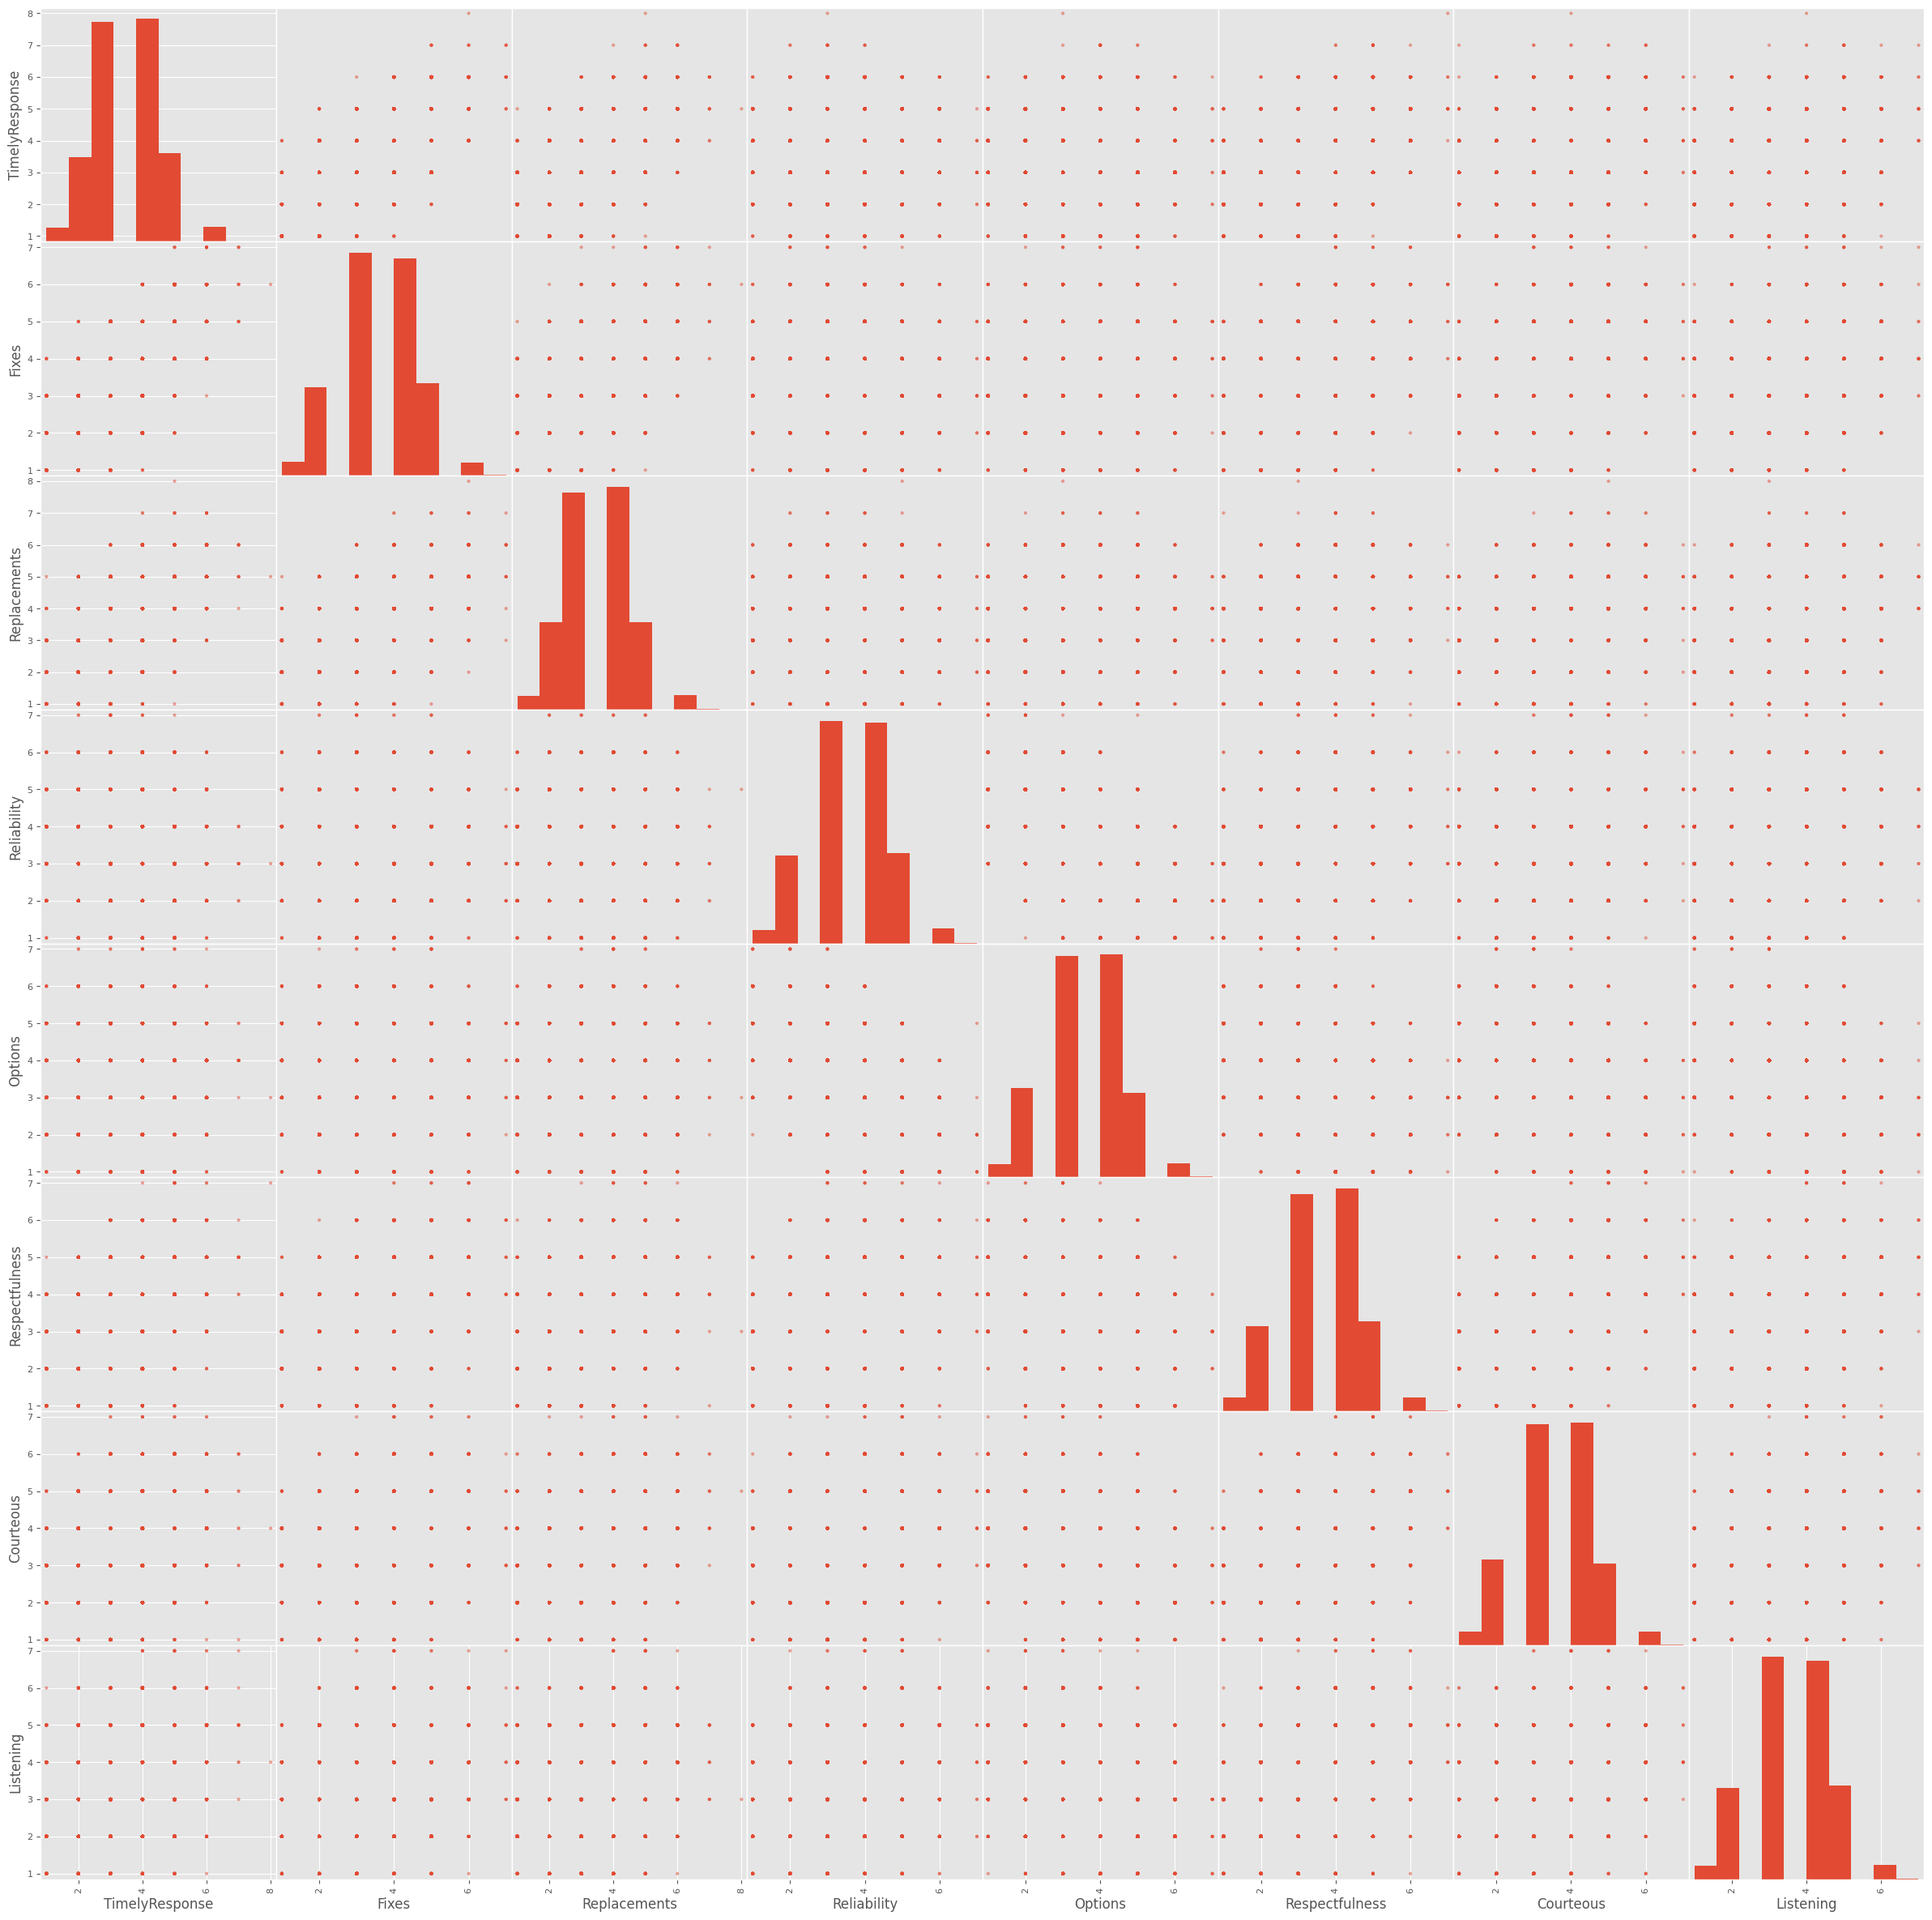

In [204]:
# A scatter matrix of the discrete variables for high level overview of potential relationships & distributions
med_discrete = med_df[['ReAdmis','TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options', 
                           'Respectfulness', 'Courteous', 'Listening']]
pd.plotting.scatter_matrix(med_discrete, figsize = [30, 30])

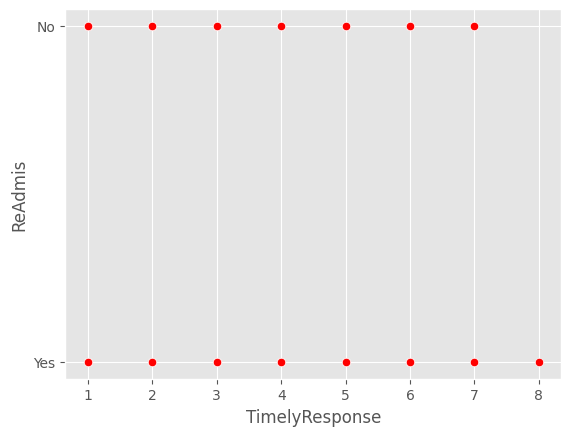

In [205]:
# An individual scatterplot for viewing relationship of key financial feature against target variable
sns.scatterplot(x = med_df['TimelyResponse'], y = med_df['ReAdmis'], color='red')
plt.show()

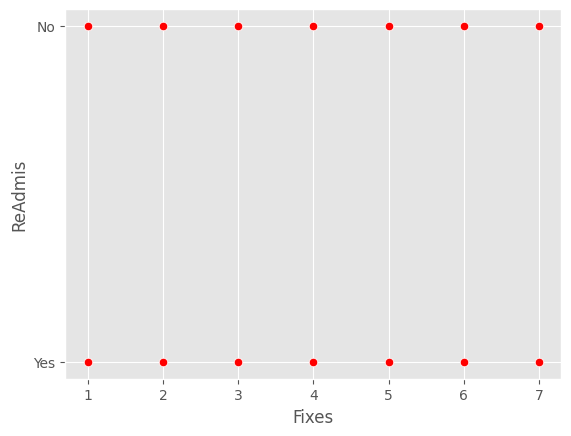

In [206]:
sns.scatterplot(x = med_df['Fixes'], y = med_df['ReAdmis'], color='red')
plt.show()

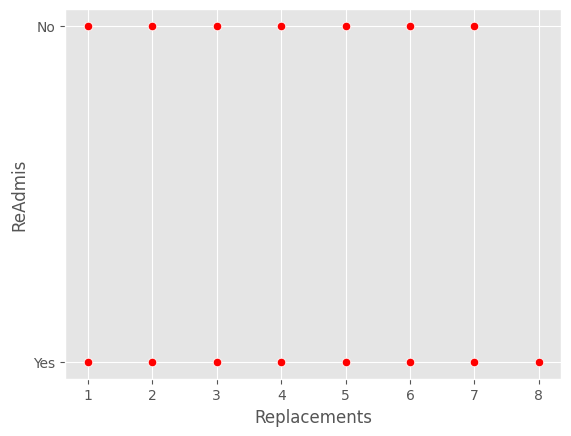

In [207]:
sns.scatterplot(x = med_df['Replacements'], y = med_df['ReAdmis'], color='red')
plt.show()

In [208]:
# Converting binary categorical variables to numeric variables
med_df['ReAdmis_num'] = [1 if v == 'Yes' else 0 for v in med_df['ReAdmis']]
med_df['Soft_drink_num'] = [1 if v == 'Yes' else 0 for v in med_df['Soft_drink']]
med_df['HighBlood_num'] = [1 if v == 'Yes' else 0 for v in med_df['HighBlood']]
med_df['Stroke_num'] = [1 if v == 'Yes' else 0 for v in med_df['Stroke']]
med_df['Overweight_num'] = [1 if v == 'Yes' else 0 for v in med_df['Overweight']]
med_df['Arthritis_num'] = [1 if v == 'Yes' else 0 for v in med_df['Arthritis']]
med_df['Diabetes_num'] = [1 if v == 'Yes' else 0 for v in med_df['Diabetes']]
med_df['Hyperlipidemia_num'] = [1 if v == 'Yes' else 0 for v in med_df['Hyperlipidemia']]
med_df['BackPain_num'] = [1 if v == 'Yes' else 0 for v in med_df['BackPain']]
med_df['Anxiety_num'] = [1 if v == 'Yes' else 0 for v in med_df['Anxiety']]
med_df['Allergic_rhinitis_num'] = [1 if v == 'Yes' else 0 for v in med_df['Allergic_rhinitis']]
med_df['Reflux_esophagitis_num'] = [1 if v == 'Yes' else 0 for v in med_df['Reflux_esophagitis']]
med_df['Asthma_num'] = [1 if v == 'Yes' else 0 for v in med_df['Asthma']]

In [209]:
#Drop original categorical features from dataframe for further analysis
med_df = med_df.drop(columns=['ReAdmis', 'Area', 'Marital', 'Gender', 'Initial_admin', 
                                  'Complication_risk' , 'Services', 'Soft_drink', 'HighBlood', 
                                  'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
                                  'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma'])

In [210]:
#Remove the other less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis
med_df = med_df.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job'])


In [211]:
# Provide a copy of the prepared data set
med_df.to_csv('Med_prepared_D209t1.csv')


In [212]:
# List features for analysis
features = (list(med_df.columns[:-1]))
print('Features for analysis include: \n', features)

Features for analysis include: 
 ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening', 'Area_num', 'Marital_num', 'Gender_num', 'Initial_admin_num', 'Complication_risk_num', 'Services_num', 'ReAdmis_num', 'Soft_drink_num', 'HighBlood_num', 'Stroke_num', 'Overweight_num', 'Arthritis_num', 'Diabetes_num', 'Hyperlipidemia_num', 'BackPain_num', 'Anxiety_num', 'Allergic_rhinitis_num', 'Reflux_esophagitis_num']


In [213]:
# Re-read prepared dataset
med_df = pd.read_csv('Med_prepared_D209t1.csv')

In [214]:
# Set predictor features & target variable
X = med_df.drop('ReAdmis_num', axis=1).values
y = med_df['ReAdmis_num'].values

In [215]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =1)

In [216]:
# Export X_train dataset
X_train_df = pd.DataFrame(X_train)
X_train_df.to_csv('X_traint1.csv')

In [217]:
# Export X_test dataset
X_test_df = pd.DataFrame(X_test)
X_test_df.to_csv('X_testt1.csv')

In [218]:
# Export y_train dataset
y_train_df = pd.DataFrame(y_train)
y_train_df.to_csv('Y_traint1.csv')

In [219]:
# Export y_test dataset
y_test_df = pd.DataFrame(X_test)
y_test_df.to_csv('Y_testt1.csv')

In [220]:
# Initialize KNN model 
knn = KNeighborsClassifier(n_neighbors = 7)


In [221]:
# Fit data to KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [222]:
# Predict outcomes from test set
y_pred = knn.predict(X_test)

In [223]:
# Export y_pred dataset
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.to_csv('Y_predt1.csv')

In [224]:
# Print initial accuracy score of KNN model
print('Initial accuracy score KNN model: ', accuracy_score(y_test, y_pred))

Initial accuracy score KNN model:  0.903


In [225]:
# Compute classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1261
           1       0.82      0.95      0.88       739

    accuracy                           0.90      2000
   macro avg       0.89      0.91      0.90      2000
weighted avg       0.91      0.90      0.90      2000



In [226]:
# Set steps for pipeline object
steps = [('scaler', StandardScaler()),
 ('knn', KNeighborsClassifier())]

In [227]:
# Initiate pipeline
pipeline = Pipeline(steps)

In [228]:
# Split dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [229]:
# Scale dateframe with pipeline object
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

In [230]:
# Predict from scaled dataframe
y_pred_scaled = pipeline.predict(X_test_scaled)

In [231]:
# Print new accuracy score of scaled KNN model
print('New accuracy score of scaled KNN model: {:0.3f}'.format(accuracy_score(y_test_scaled, y_pred_scaled)))

New accuracy score of scaled KNN model: 0.884


In [232]:
# Compute classification metrics after scaling
print(classification_report(y_test_scaled, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1261
           1       0.80      0.91      0.85       739

    accuracy                           0.88      2000
   macro avg       0.87      0.89      0.88      2000
weighted avg       0.89      0.88      0.89      2000



In [233]:
#Confusion_matrix & generate results
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1104  157]
 [  37  702]]


<Axes: >

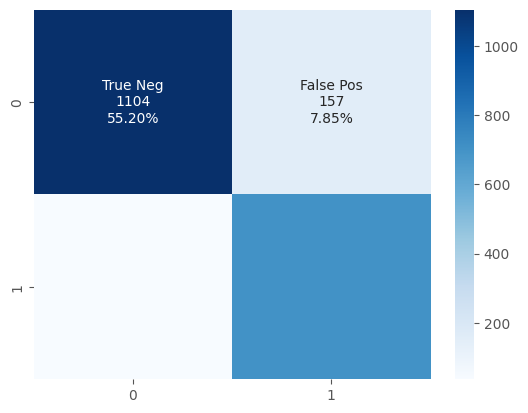

In [234]:
# Visual confusion matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [235]:
# Set up parameters grid
param_grid = {'n_neighbors': np.arange(1, 50)}
# Re-initializing KNN for cross validation
knn = KNeighborsClassifier()
# Initializing GridSearch cross validation
knn_cv = GridSearchCV(knn , param_grid, cv=5)
# Fit model to 
knn_cv.fit(X_train, y_train)
# Print best parameters
print('Best parameters for this KNN model: {}'.format(knn_cv.best_params_))

Best parameters for this KNN model: {'n_neighbors': 5}


In [236]:
# Generate model best score
print('Best score for this KNN model: {:.3f}'.format(knn_cv.best_score_))

Best score for this KNN model: 0.899


In [237]:
# Fit it to the data
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [238]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]

In [239]:
# Compute and print AUC score
print("The Area under curve (AUC) on validation dataset is: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

The Area under curve (AUC) on validation dataset is: 0.9699


In [240]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')

In [241]:
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.9998008  0.99991498 0.9996863  0.98354092 0.56304587]
